In [1]:
%reset
from helpers import helper_functions
import time
import os

import tensorflow as tf
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
import yaml

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Using TensorFlow backend.


In [45]:
data_dir = "/global/cscratch1/sd/al34/data_50ms/pred_dens_same_normalization/"


In [46]:
train_data = (helper_functions.load_obj(data_dir+'train_data'))
target_data = (helper_functions.load_obj(data_dir+'train_target'))


In [9]:
train_data.keys()

dict_keys(['previous_actuators', 'previous_profiles', 'future_actuators'])

In [10]:
train_data["previous_actuators"].keys()

dict_keys(['curr', 'pinj', 'ech'])

In [104]:
train_data["previous_actuators"]["curr"].shape

(312888, 5)

In [11]:
target_data.keys()

dict_keys(['temp'])

In [12]:
target_data['temp'].shape

(237467, 65)

In [107]:
len(target_data['dens'])

312888

In [125]:
target_data["dens"][300].shape

(65,)

In [134]:
train_data["previous_profiles"].keys()

dict_keys(['dens', 'temp', 'ffprime'])

In [109]:
train_data["previous_profiles"]

In [146]:
sigs_0d = ["pinj", "curr"]
future_actuators = np.concatenate(([train_data["future_actuators"][sig][:, :, np.newaxis] for sig in sigs_0d]), axis =2)
previous_actuators = np.concatenate(([train_data["previous_actuators"][sig][:, :, np.newaxis] for sig in sigs_0d]), axis =2)



In [128]:
train_data["previous_profiles"]["dens"].shape
previous_actuators.shape

(312888, 5, 2)

In [123]:
np.concatenate((previous_actuators, future_actuators), axis = 1).shape

(312888, 9, 2)

In [122]:
previous_actuators.shape

(312888, 5, 2)

In [111]:
train_data["future_actuators"]["pinj"].shape

(312888, 4)

In [129]:
train_data["previous_profiles"]["dens"].shape

(312888, 5, 65)

In [141]:
sigs_1d=["dens", "temp", "ffprime"]

In [149]:
all_profiles = np.concatenate(([train_data["previous_profiles"][sig] for sig in sigs_1d]), axis = 2)

In [153]:
np.concatenate((all_profiles, previous_actuators), axis = 2).shape

(312514, 5, 197)

In [ ]:
train_data["previous_profiles"]["dens"].shape

In [147]:
previous_actuators.shape

(312514, 5, 2)

In [55]:
temp_split_actuators = {}
temp_split_actuators["pinj"] = train_data[2][0, :100]
temp_split_actuators["curr"] = train_data[2][1, :100]

In [82]:
generated_train_dict = {}
generated_train_dict["future_actuators"] = np.concatenate(([temp_split_actuators[sig][:, :, np.newaxis] for sig in ["pinj", "curr"]]), axis = 2)

In [83]:
generated_train_dict["actuators"].shape

(100, 4, 2)

In [59]:
train_data[2][0, :100].shape

(100, 4)

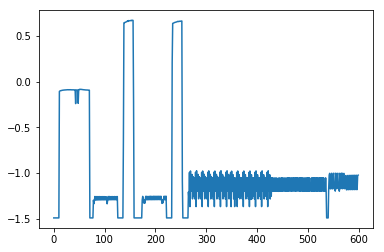

In [77]:
plt.plot(train_data[2][1, :600, 0])

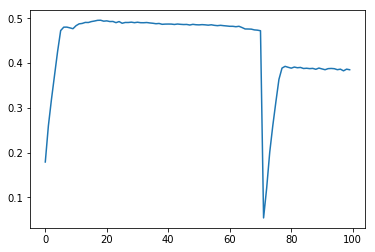

In [81]:
plt.plot(generated_train_dict["actuators"][:, 0, 1])

In [154]:
target_data["dens"].shape

(312514, 65)

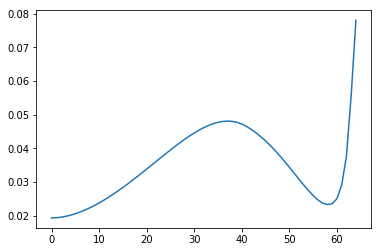

In [157]:
plt.plot(target_data["dens"][2])

In [175]:
np.mean(np.abs(target_data["dens"]))

0.50367601285878238

In [167]:
np.mean(np.abs(target_data))

0.12996556003137519

In [42]:
means = (helper_functions.load_obj(data_dir+'means'))
stds = (helper_functions.load_obj(data_dir+'stds'))


In [43]:
means

{'curr': 827056.58410952566,
 'dens': 3.9106883732213764,
 'ech': 4.6683974135416211,
 'pinj': 4544.5837959618511,
 'temp': 1.6602533177733108}

In [44]:
stds

{'curr': 727299.63758174772,
 'dens': 1.8742109926003516,
 'ech': 9.2600142266424008,
 'pinj': 2780.8793768338628,
 'temp': 0.699711939842803}

In [21]:
test = np.array([2,2,2,2])
test1 = 3
test/test1

array([ 0.66666667,  0.66666667,  0.66666667,  0.66666667])

In [25]:
test = np.zeros([300, 65])+1

In [36]:
np.std(test, axis = 0)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [53]:
train_data["previous_profiles"]["dens"][1,1,:]

array([-0.48181233, -0.48873683, -0.50608289, -0.53331003, -0.56766313,
       -0.60746171, -0.65069925, -0.69533842, -0.739575  , -0.78253935,
       -0.82358589, -0.86291249, -0.90041949, -0.93619579, -0.97032384,
       -1.00271883, -1.03362834, -1.06281044, -1.09058572, -1.1167999 ,
       -1.14160957, -1.16501648, -1.18702921, -1.20778932, -1.22717374,
       -1.24541687, -1.26237235, -1.2782344 , -1.29295427, -1.30660391,
       -1.31924861, -1.33085457, -1.34158467, -1.35131556, -1.36024915,
       -1.36831602, -1.37562178, -1.38218513, -1.38803173, -1.39325216,
       -1.3978082 , -1.40183244, -1.40528043, -1.40826142, -1.41077755,
       -1.41288395, -1.41462896, -1.41602965, -1.41716471, -1.41803044,
       -1.41871249, -1.41923398, -1.4196687 , -1.42010186, -1.42073356,
       -1.42192765, -1.42503218, -1.43252117, -1.45371143, -1.5053176 ,
       -1.61684776, -1.77664434, -1.90822474, -1.97020264, -1.99628134])

In [57]:
train_data["previous_profiles"].keys()

dict_keys(['dens', 'temp'])

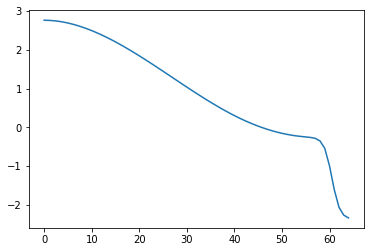

In [58]:
plt.plot(train_data["previous_profiles"]["temp"][30,1,:])